Angelo Zhu
59714552

# Problem 1 Part 1

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

path_to_file = "C:/Users/Angelo/Downloads/178-hw2-code/data/curve80.txt"
data = np.genfromtxt(path_to_file, delimiter=None)

X = data[:,0]
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure it's 2-dimensional
Y = data[:,1]
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25

print(Xtr.shape)
print(Xte.shape)
print(Ytr.shape)
print(Yte.shape)
print(Xtr)

(60, 1)
(20, 1)
(60,)
(20,)
[[3.4447005 ]
 [4.7580645 ]
 [6.4170507 ]
 [5.7949309 ]
 [7.7304147 ]
 [7.8225806 ]
 [7.7304147 ]
 [7.7764977 ]
 [8.6751152 ]
 [6.4631336 ]
 [5.1267281 ]
 [6.7396313 ]
 [3.1451613 ]
 [9.1589862 ]
 [8.2373272 ]
 [4.8041475 ]
 [0.35714286]
 [8.0069124 ]
 [2.2465438 ]
 [6.7626728 ]
 [5.0115207 ]
 [8.7211982 ]
 [1.6935484 ]
 [4.8502304 ]
 [8.6059908 ]
 [8.2142857 ]
 [0.81797235]
 [5.7488479 ]
 [6.7165899 ]
 [2.0391705 ]
 [5.1036866 ]
 [4.343318  ]
 [4.4815668 ]
 [7.3156682 ]
 [8.5138249 ]
 [9.0207373 ]
 [5.4953917 ]
 [6.0483871 ]
 [4.5506912 ]
 [2.6843318 ]
 [6.8087558 ]
 [1.7857143 ]
 [5.4723502 ]
 [3.375576  ]
 [7.7304147 ]
 [6.7396313 ]
 [4.2741935 ]
 [4.781106  ]
 [5.8870968 ]
 [8.8133641 ]
 [5.9101382 ]
 [4.8502304 ]
 [6.6013825 ]
 [1.2557604 ]
 [4.1129032 ]
 [7.1774194 ]
 [4.8271889 ]
 [2.9147465 ]
 [5.1728111 ]
 [5.8410138 ]]


# Problem 1 Part 2

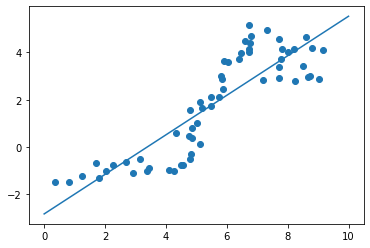

y-intercept: -2.827650487664812 
Slope: 0.8360691602619538
MSE of test data: [1.12771196]
MSE of training data: [2.2423492]


In [2]:
lr = ml.linear.linearRegress( Xtr, Ytr ) # create and train model
xs = np.linspace(0,10,200) # densely sample possible x-values
xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix (expected by our code)
ys = lr.predict( xs ) # make predictions at xs

# a
plt.scatter(Xtr, Ytr)
plt.plot(xs, ys)
plt.show()

# b
print("y-intercept:", lr.theta[0][0], "\nSlope:", lr.theta[0][1])

# c
Yhat_tr = lr.predict(Xtr)
Yhat_te = lr.predict(Xte)

def find_MSE(y, yhat):
    total = 0
    for i in range(len(y)):
        total += (y[i] - yhat[i])**2
    return total/len(y)

print("MSE of test data:", find_MSE(Ytr, Yhat_tr))
print("MSE of training data:", find_MSE(Yte, Yhat_te))

# Problem 1 Part 3a

(60, 1)


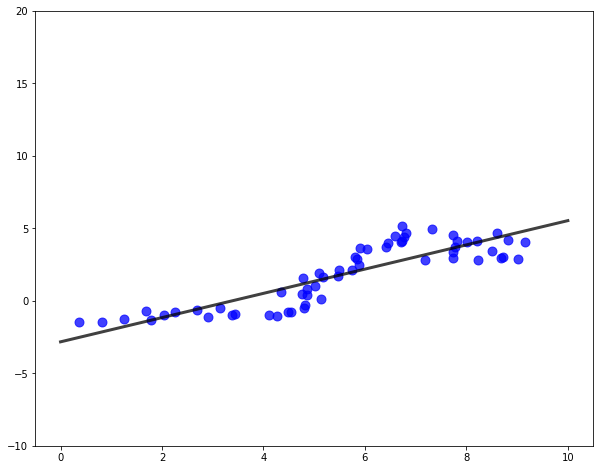

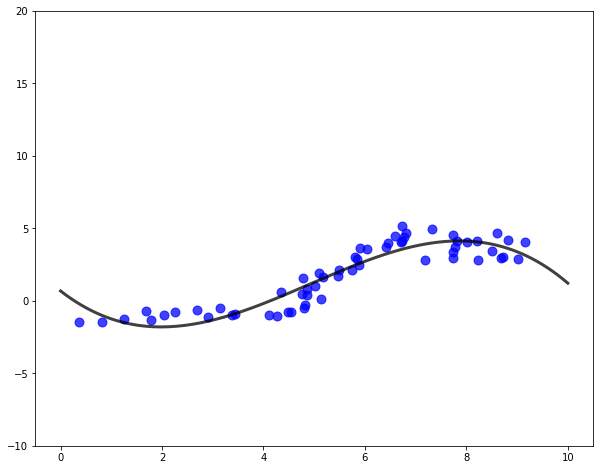

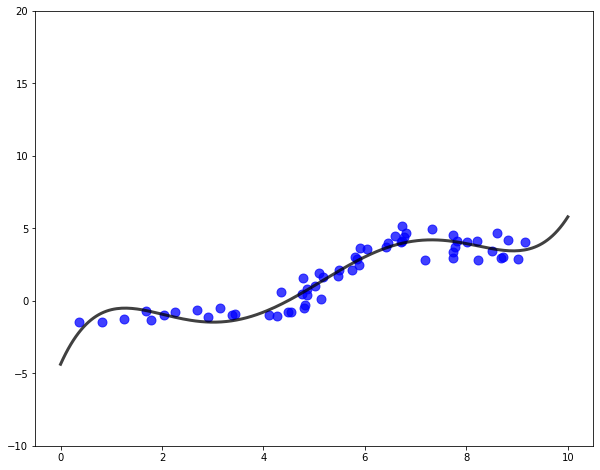

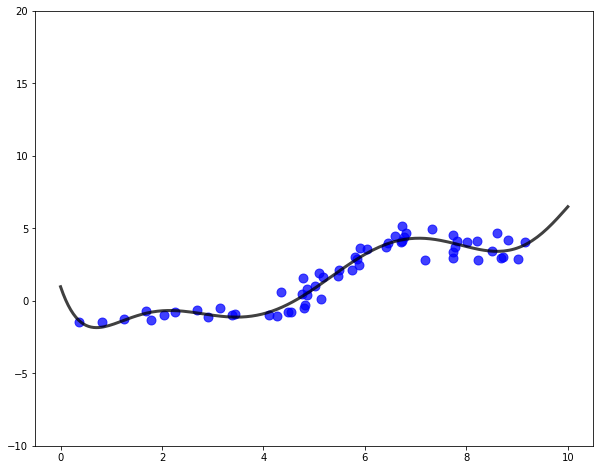

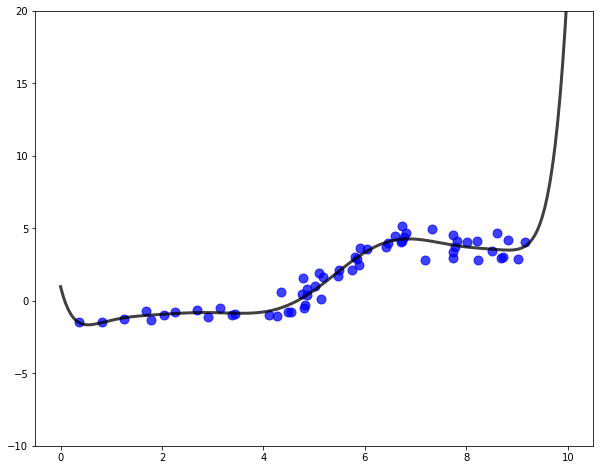

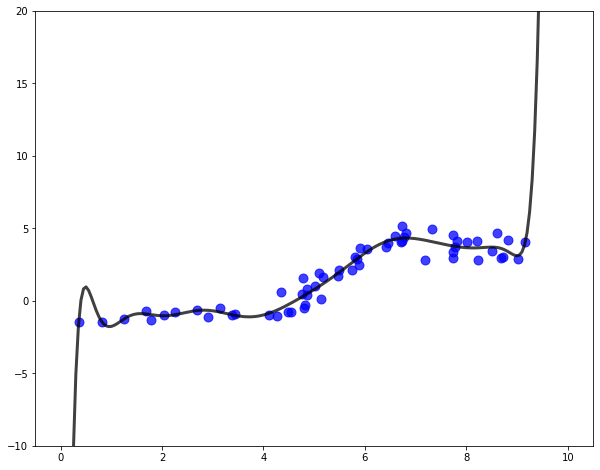

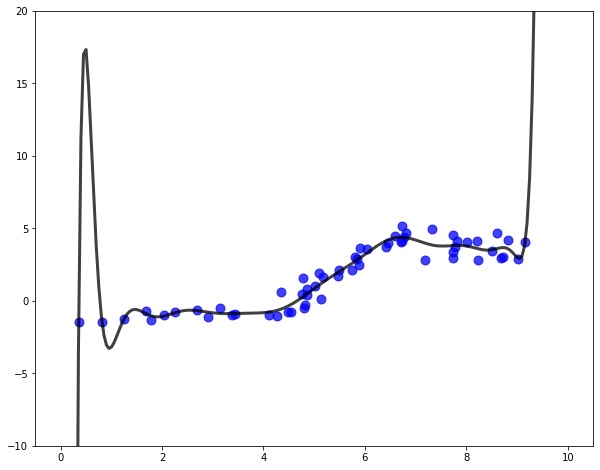

In [5]:
degree = [1, 3, 5, 7, 10, 15, 18]
print(Xtr.shape)
for d in degree:
    # Resize training data
    XtrP = ml.transforms.fpoly(Xtr, d, False)
    XtrP,params = ml.transforms.rescale(XtrP)
    XteP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xte, d, False), params)
    lr = ml.linear.linearRegress( XtrP, Ytr ) # create and train model

    # Resize prediction function
    xs = np.linspace(0,10,200) # densely sample possible x-values
    xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix (expected by our code)
    xsP,_ = ml.transforms.rescale( ml.transforms.fpoly(xs, d, False), params)
    ys = lr.predict(xsP)
 
    f, ax = plt.subplots(1, 1, figsize=(10, 8))
    ax.set_ylim(-10, 20)
    
    ax.scatter(Xtr, Ytr, s=80, color='blue', alpha=0.75, label='Train')
    ax.plot(xs, ys, lw=3, color='black', alpha=0.75, label='Prediction')
    plt.show()

# Problem 1 Part 3b

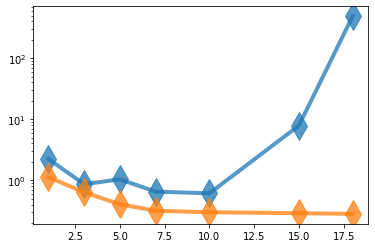

In [11]:
tr_mse_error = [None] *len(degree)
te_mse_error = [None]*len(degree)

for i, d in enumerate(degree):
    XtrP = ml.transforms.fpoly(Xtr, d, False)
    XtrP,params = ml.transforms.rescale(XtrP)

    lr = ml.linear.linearRegress(XtrP, Ytr)
    XteP = ml.transforms.fpoly(Xte, d, False)
    XteP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xte, d, False), params)
    
    YteHat = lr.predict(XteP)
    tr_mse_error[i] = find_MSE(Yte, YteHat)
    
    YtrHat = lr.predict(XtrP)
    te_mse_error[i] = find_MSE(Ytr, YtrHat)
    
plt.semilogy(degree, tr_mse_error, lw=4, marker='d', markersize=20, alpha=0.75, label='MSE ERROR')
plt.semilogy(degree, te_mse_error, lw=4, marker='d', markersize=20, alpha=0.75, label='MSE ERROR')
plt.show()

# Problem 1 Part 3c

I would recommend a polynomial degree of 10 because it has the lowest testing MSE. Any higher degree polynomial has a higher MSE and greater chance of overfitting. Additionally, the difference between training and testing MSE for degree 10 is very low.

# Problem 2 Part 1

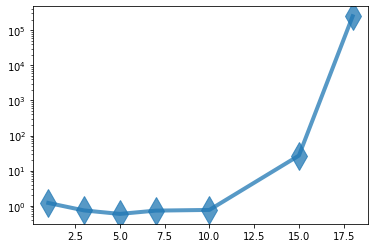

In [10]:
def find_cv_err(degree, folds):
    pass

nFolds = 5
J = [None]*nFolds
mse_error_folds = [None]*len(degree)

for i,d in enumerate(degree):
    for iFold in range(nFolds):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,nFolds,iFold) # use ith block as validation

        XtiP = ml.transforms.fpoly(Xti, d, False)
        XtiP,params = ml.transforms.rescale(XtiP)
        learner = ml.linear.linearRegress(XtiP, Yti)
        XviP = ml.transforms.fpoly(Xvi, d, False)
        XviP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xvi, d, False), params)

        YtiHat = learner.predict(XviP)
        J[iFold] = find_MSE(Yvi, YtiHat)
        
    mse_error_folds[i] = np.mean(J)

plt.semilogy(degree, mse_error_folds, lw=4, marker='d', markersize=20, alpha=0.75, label='MSE ERROR')
plt.show()

# Problem 2 Part 2

The MSE for polynomial degrees 7 and greater increased, while the others decreased. Polynomial degree of 5 has the lowest MSE using cross-validation.

# Problem 2 Part 3

I recommend a degree of 5 because it has the minimum MSE error and MSE errors for degrees less than and greater than 5 are increasing, suggesting that degrees less than 5 do not provide as good of a fit and degrees greater than 5 have a higher chance of overfitting.

# Problem 2 Part 4

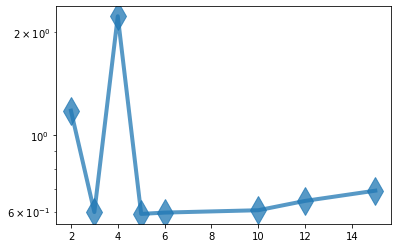

In [6]:
nFolds = [2, 3, 4, 5, 6, 10, 12, 15]
d = 5
mse_error_folds = [None]*len(nFolds)
for i,n in enumerate(nFolds):
    J = [None]*n
    for iFold in range(n):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,n,iFold) # use ith block as validation
        XtiP = ml.transforms.fpoly(Xti, d, False)
        learner = ml.linear.linearRegress(XtiP, Yti)
        XviP = ml.transforms.fpoly(Xvi, d, False)
    
        YtiHat = learner.predict(XviP)
        J[iFold] = find_MSE(Yvi, YtiHat)
    mse_error_folds[i] = np.mean(J)

plt.semilogy(nFolds, mse_error_folds, lw=4, marker='d', markersize=20, alpha=0.75, label='MSE ERROR')
plt.show()

There does not seem to be a pattern. This is because we only have 60 data points to split off for our k-cross-validation, so initially there is high variance for our lower number of folds. As the number of folds increases, the variance decreases and we can see that the cross-validation MSE error remains very similar.

# Problem 3 Statement of Collaboration

Jupyter discussion code, piazza